In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import string
from matplotlib import pyplot as plt


In [2]:
asciis = list(filter(lambda a: a.isprintable(), string.printable))
asciis = "".join(asciis)

asciis

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

In [3]:
fnt = ImageFont.truetype("fonts/CascadiaMono.ttf", 11)
bbox = fnt.getbbox(asciis)
width, height = bbox[2], bbox[3]
letter_width = width / len(asciis)

print(bbox)
print(width, height)
print(letter_width)
print(height / letter_width)

(0, 1, 570, 14)
570 14
6.0
2.3333333333333335


In [4]:
img = Image.new(mode="L", size=(width, height), color=(0))
img_d = ImageDraw.Draw(img)

img_d.text((0,0), asciis, font=fnt, fill=(255))

In [5]:
for i in range(0, len(asciis)):
    img_d.line([(i * letter_width, 0), (i * letter_width, height)], fill=255, width=1)

img

In [6]:
img_d.line([(0, height//2), (width, height//2)], fill=255, width=1)

img

In [7]:
img = Image.new(mode="L", size=(width, height), color=(0))
img_d = ImageDraw.Draw(img)

img_d.text((0,0), asciis, font=fnt, fill=(255))

img

(63, 1)
0.6631578947368421


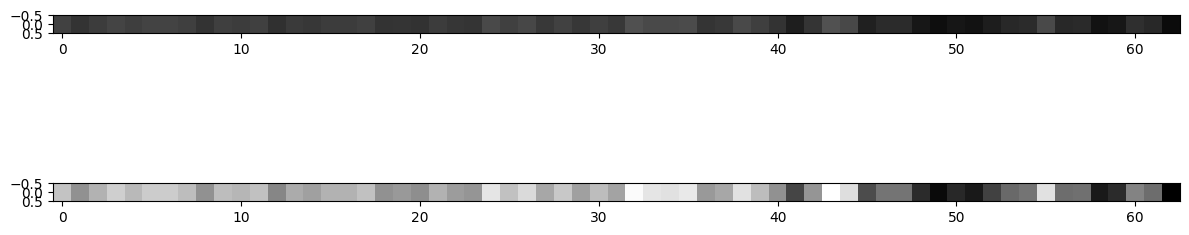

In [8]:
scale = 1/9
resized_box = (int(img.width * scale), int(img.height * scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

(190, 4)
2.0


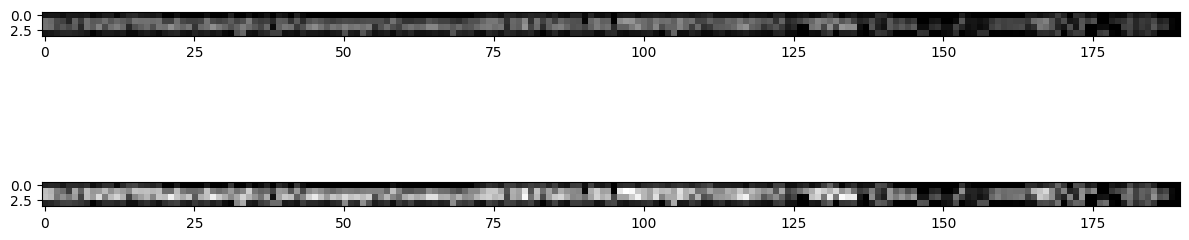

In [9]:
scale = 1/3
resized_box = (int(img.width * scale), int(img.height * scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

(126, 5)
1.3263157894736841


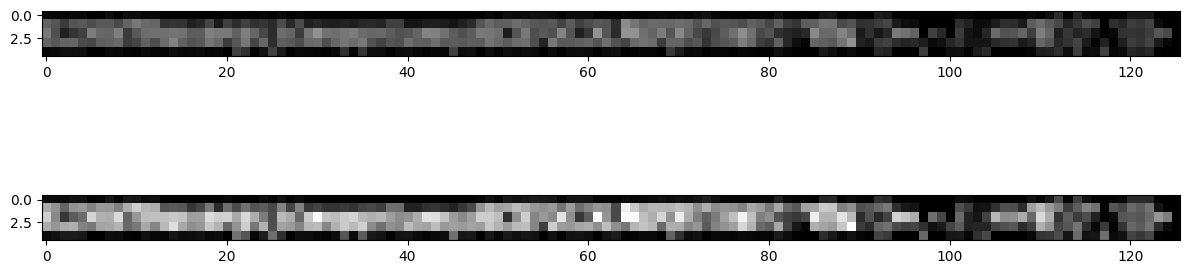

In [10]:
w_scale = 2/9
h_scale = 8/19
resized_box = (int(img.width * w_scale), int(img.height * h_scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

In [11]:
from generate_ascii_palette import generate_brightness_map

char_set = '-`.\'L@'
brightness_map = generate_brightness_map(char_set, fnt, (2,4), normalize=True)
for c, b in brightness_map.items():
    print(f'\'{c}\'')
    print(b)

'-'
[[0.         0.        ]
 [0.38888889 0.45138889]
 [0.16666667 0.19444444]
 [0.         0.        ]]
'`'
[[0.32638889 0.32638889]
 [0.09722222 0.20138889]
 [0.         0.        ]
 [0.         0.        ]]
'.'
[[0.         0.        ]
 [0.         0.        ]
 [0.15277778 0.20138889]
 [0.04861111 0.0625    ]]
'''
[[0.27083333 0.36111111]
 [0.17361111 0.23611111]
 [0.         0.        ]
 [0.         0.        ]]
'L'
[[0.49305556 0.        ]
 [0.69444444 0.        ]
 [0.8125     0.45138889]
 [0.13888889 0.20833333]]
'@'
[[0.55555556 0.76388889]
 [0.9375     1.        ]
 [0.86805556 0.8125    ]
 [0.25       0.30555556]]
